In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data in subfolder
df = pd.read_csv('data/BankChurners.csv')
df



,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


Data Dictionary

    CLIENTNUM: Client number. Unique identifier for the customer holding the account
        
    Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
        
    Customer_Age: Age in Years
        
    Gender: Gender of the account holder
        
    Dependent_count: Number of dependents
        
    Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
        
    Marital_Status: Marital Status of the account holder
        
    Income_Category: Annual Income Category of the account holder
        
    Card_Category: Type of Card
        
    Months_on_book: Period of relationship with the bank
        
    Total_Relationship_Count: Total no. of products held by the customer
        
    Months_Inactive_12_mon: No. of months inactive in the last 12 months
        
    Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
        
    Credit_Limit: Credit Limit on the Credit Card
        
    Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
        
    Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
        
    Total_Trans_Amt: Total Transaction Amount (Last 12 months)
        
    Total_Trans_Ct: Total Transaction Count (Last 12 months)
        
    Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
        
    Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
        
    Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

In [3]:
#drop client number and naive bayes columns
df_clean = df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

#eda
print(df.head())
print(df.columns)
print(df.info())
print(df.describe())
print(df.isnull().sum())
df_clean

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1       

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [3]:
#drop client number and naive bayes columns
df_clean = df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)


In [27]:

#percentage of attrited and customers by columns
def percent_attrited(df, column):
    percent = df.groupby(column)['Attrition_Flag'].value_counts(normalize=True).unstack()
    return percent

# percent_attrited(df_clean, 'Education_Level')

# Get the list of columns in df_clean
columns = df_clean.columns
#exclude [Attrition Flag, Credit Limit, Total Revolving Balance, Avg Open To Buy, Total Amt Chng Q4 Q1, Total, avg Utilization ratio, total trans_ct, total ct chng q4 q1, total count, total revol bal]
# Get the list of columns in df_clean excluding specified columns
exclude_columns = ['Attrition_Flag', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total', 'Avg_Utilization_Ratio', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']
columns = [column for column in df_clean.columns if column not in exclude_columns]



# Iterate over each column and call the percent_attrited function
for column in columns:
    percent = percent_attrited(df_clean, column)
    attrition_ls = []
    attrition_ls.append(percent)
    print(f"Percentage of attrited and existing customers by {column}:")
    print(percent)
    print()




Percentage of attrited and existing customers by Customer_Age:
Attrition_Flag  Attrited Customer  Existing Customer
Customer_Age                                        
26                       0.076923           0.923077
27                       0.093750           0.906250
28                       0.034483           0.965517
29                       0.125000           0.875000
30                       0.214286           0.785714
31                       0.142857           0.857143
32                       0.160377           0.839623
33                       0.157480           0.842520
34                       0.130137           0.869863
35                       0.114130           0.885870
36                       0.108597           0.891403
37                       0.142308           0.857692
38                       0.155116           0.844884
39                       0.144144           0.855856
40                       0.177285           0.822715
41                       0.200528   

Text(0.5, 1.0, 'Distribution of Income Category for Attrited Customers')

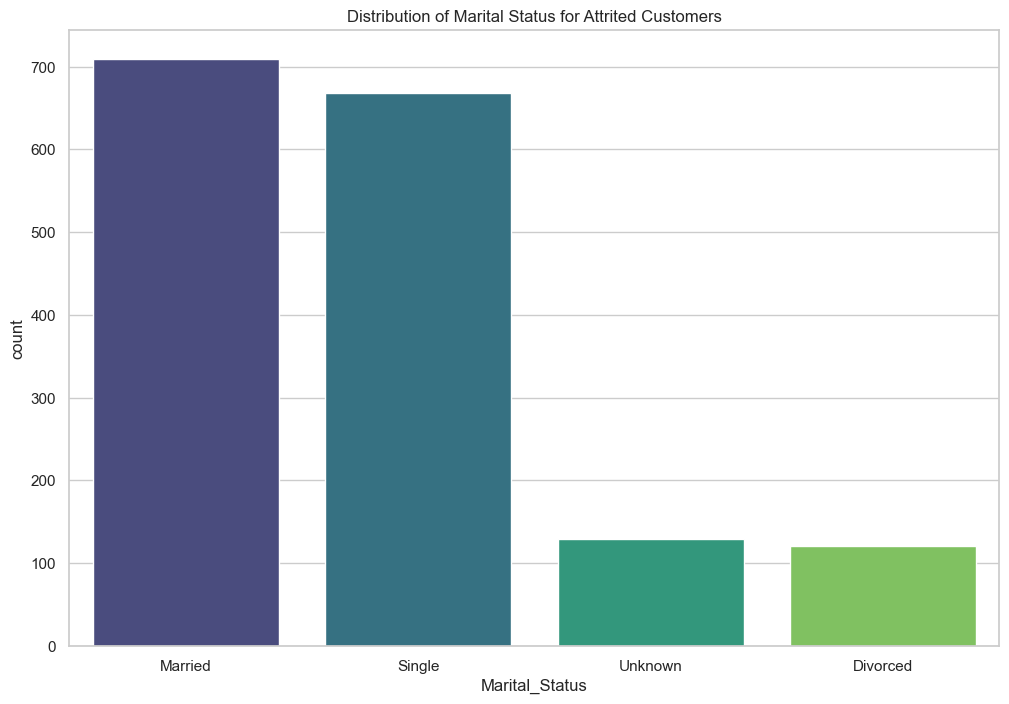

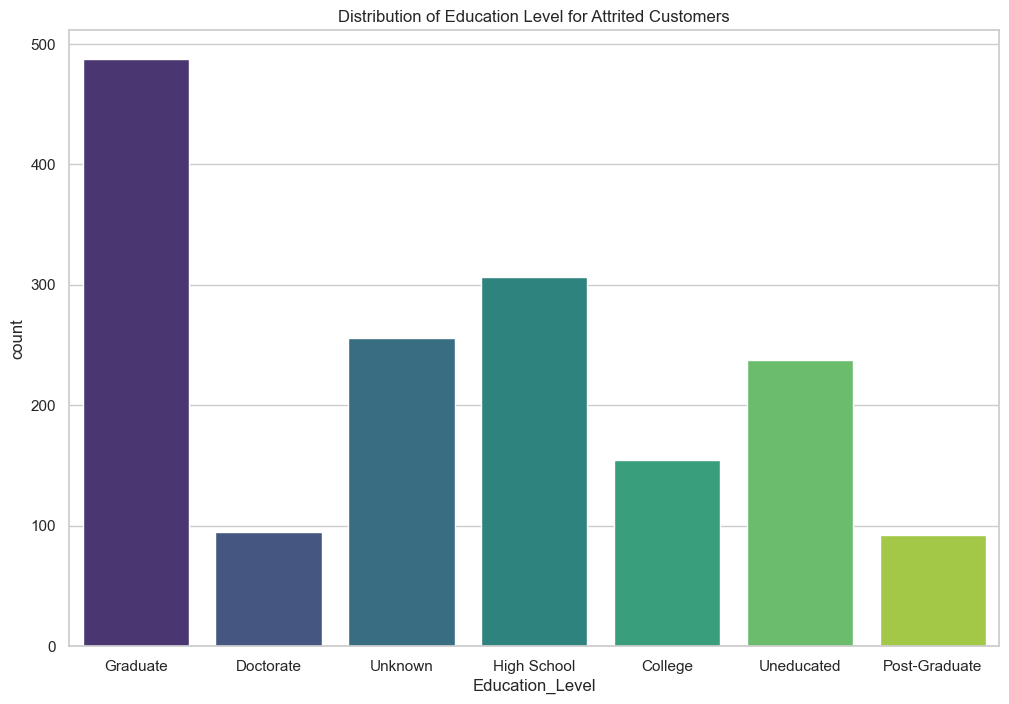

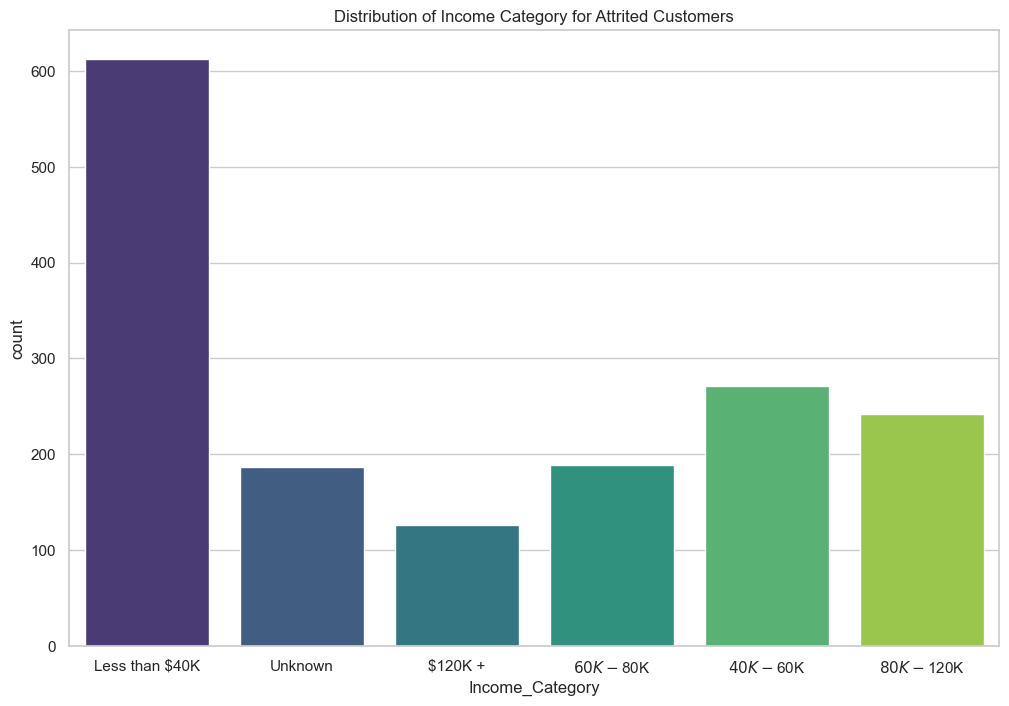

In [50]:
# get dataframe of attrited customers only from cleaned_df
attrited_df = df_clean[df_clean['Attrition_Flag'] == 'Attrited Customer']

# plot the distribution of marital statusm education level, annual income, card type, for attrited customers
plt.figure(figsize=(12, 8))
sns.countplot(data=attrited_df, x='Marital_Status', palette='viridis')
plt.title('Distribution of Marital Status for Attrited Customers')

plt.figure(figsize=(12, 8))
sns.countplot(data=attrited_df, x='Education_Level', palette='viridis')
plt.title('Distribution of Education Level for Attrited Customers')

plt.figure(figsize=(12, 8))
sns.countplot(data=attrited_df, x='Income_Category', palette='viridis')
plt.title('Distribution of Income Category for Attrited Customers')





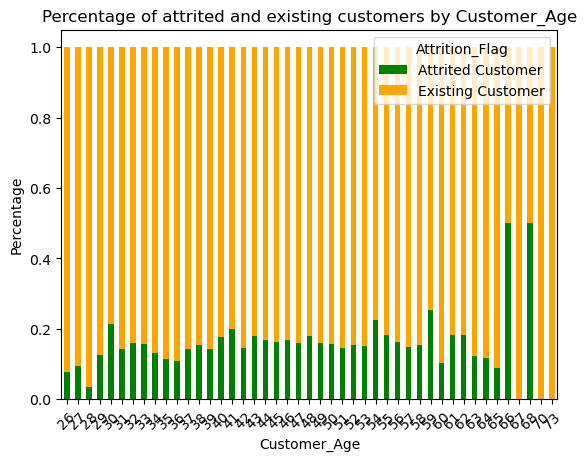

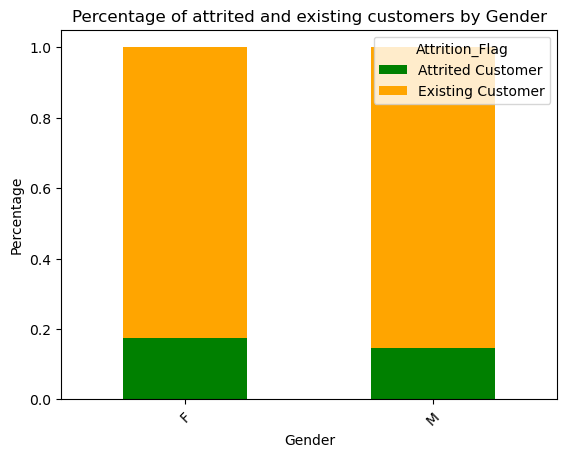

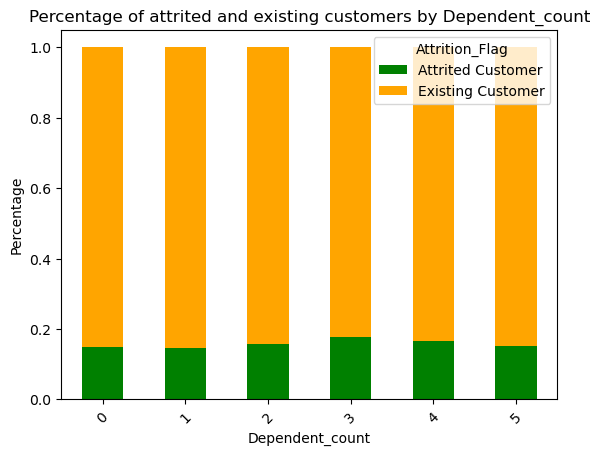

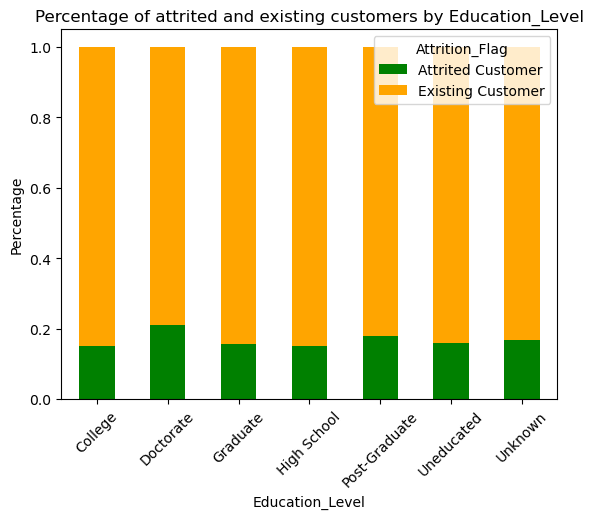

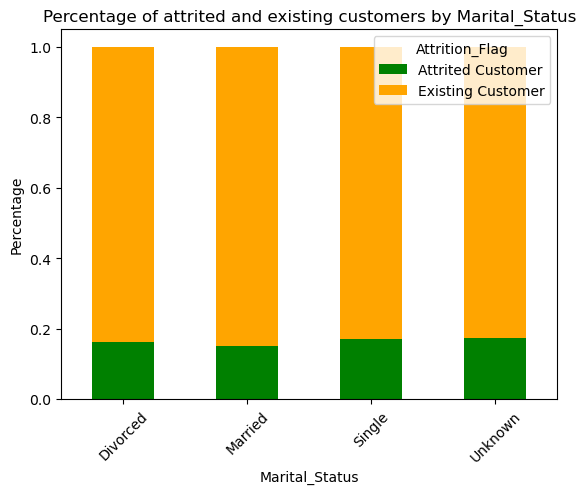

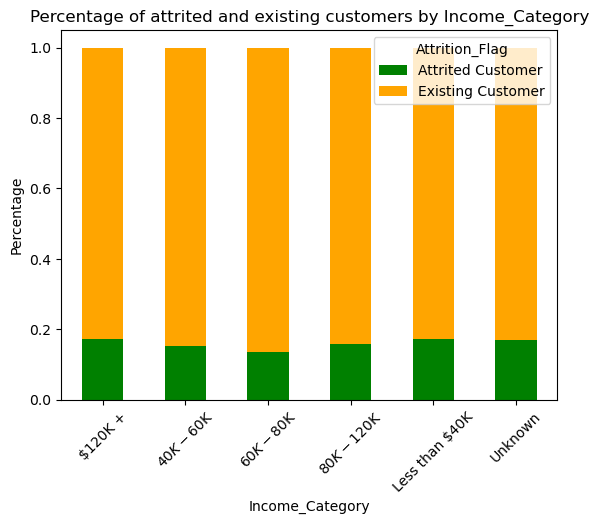

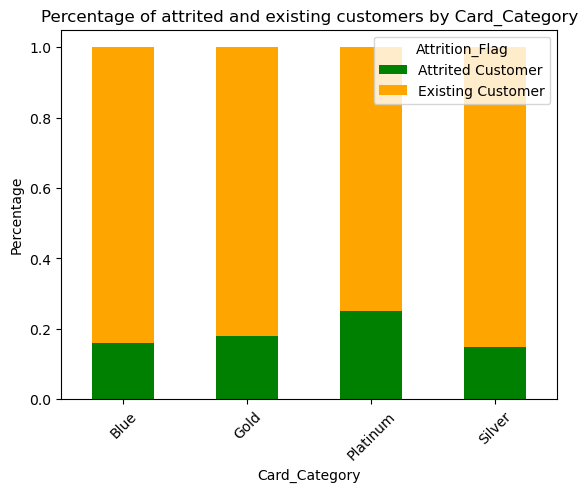

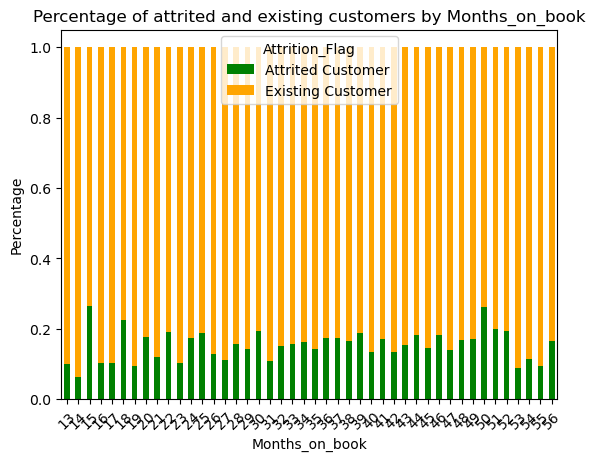

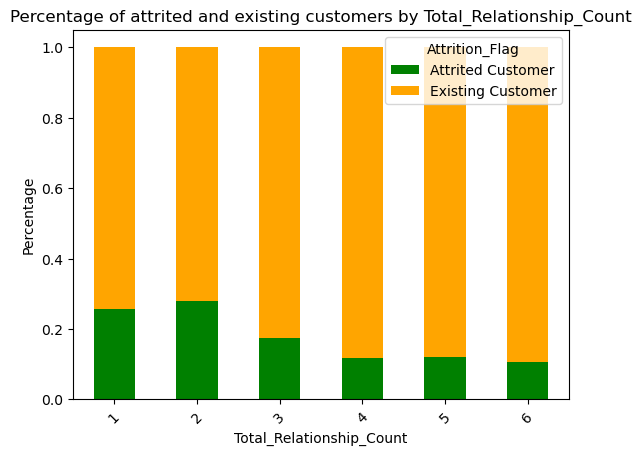

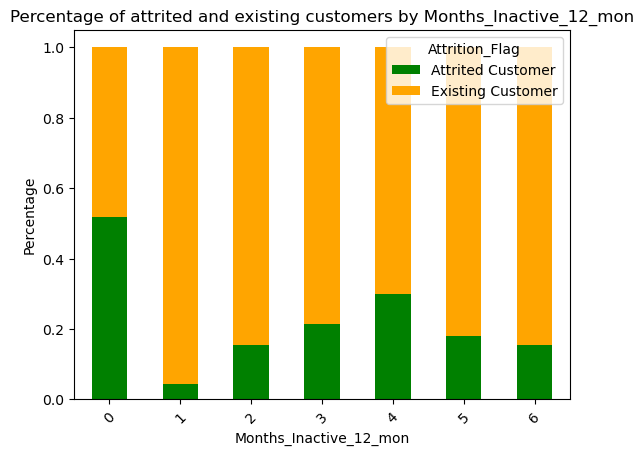

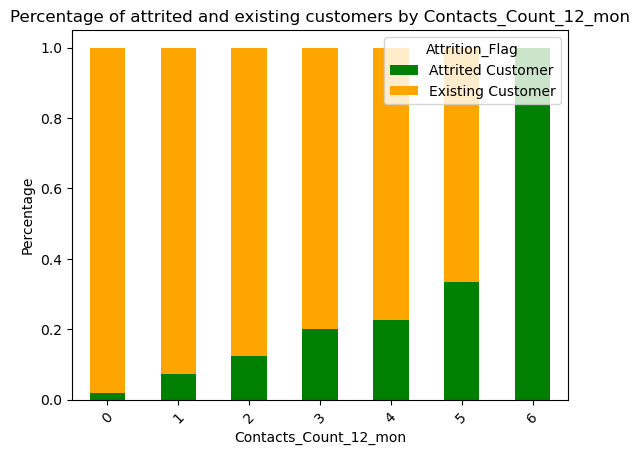

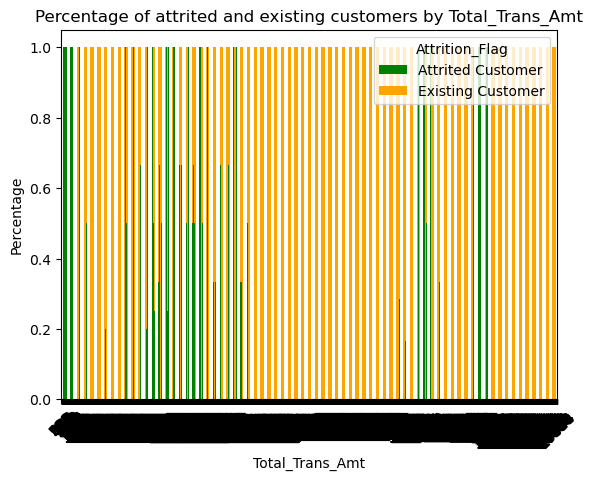

In [32]:
#plot the percentage of attrited and existing customers by columns ORANGE FOR ATTRITED, BLUE FOR EXISTING
def plot_percent_attrited(df, column):
    percent = df.groupby(column)['Attrition_Flag'].value_counts(normalize=True).unstack()
    percent.plot(kind='bar', stacked=True, color=['orange', 'green'])
    plt.title(f'Percentage of attrited and existing customers by {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.show() 

#plot_percent_attrited(df_clean, 'Education_Level')
#plot_percent
for column in columns:
    plot_percent_attrited(df_clean, column)

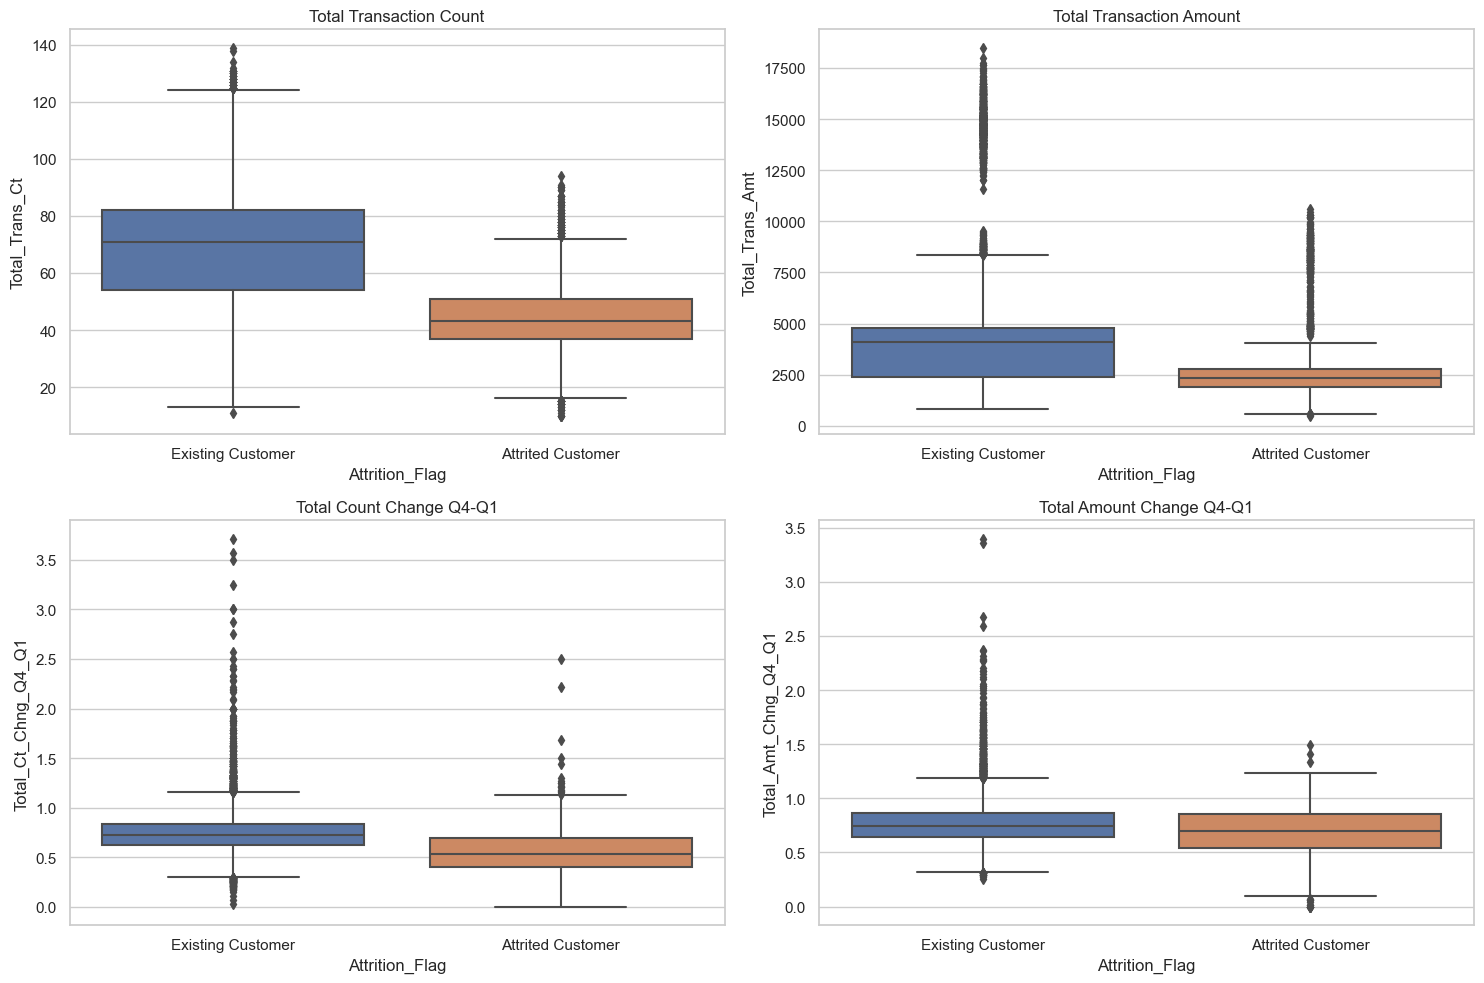

In [62]:


fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(data=df_clean, y='Total_Trans_Ct', x='Attrition_Flag', ax=ax[0, 0])
ax[0, 0].set_title('Total Transaction Count')

sns.boxplot(data=df_clean, y='Total_Trans_Amt', x='Attrition_Flag', ax=ax[0, 1])
ax[0, 1].set_title('Total Transaction Amount')

sns.boxplot(data=df_clean, y='Total_Ct_Chng_Q4_Q1', x='Attrition_Flag', ax=ax[1, 0])
ax[1, 0].set_title('Total Count Change Q4-Q1')

sns.boxplot(data=df_clean, y='Total_Amt_Chng_Q4_Q1', x='Attrition_Flag', ax=ax[1, 1])
ax[1, 1].set_title('Total Amount Change Q4-Q1')

plt.tight_layout()
plt.show()


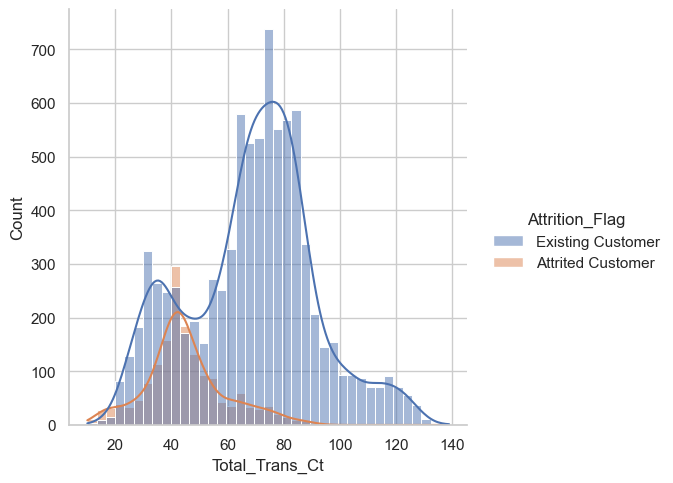

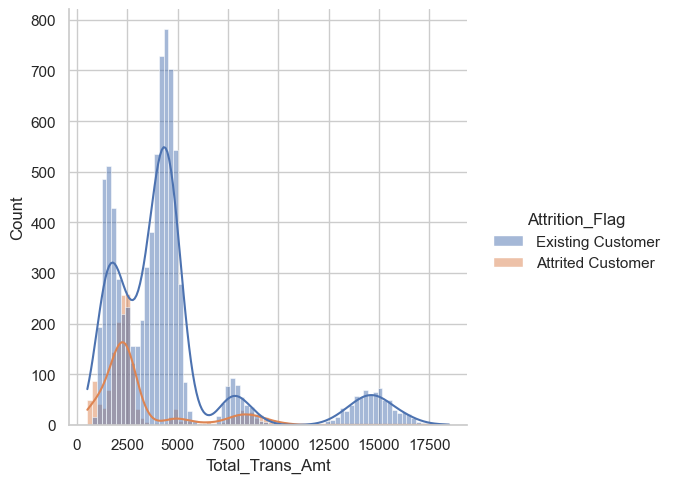

In [41]:

#plot total transaction count by attrition flag using seaborn 
# Plot total transaction count and amount by attrition flag using seaborn displot
sns.displot(data=df_clean, x='Total_Trans_Ct', hue='Attrition_Flag', kde=True)
sns.displot(data=df_clean, x='Total_Trans_Amt', hue='Attrition_Flag', kde=True)


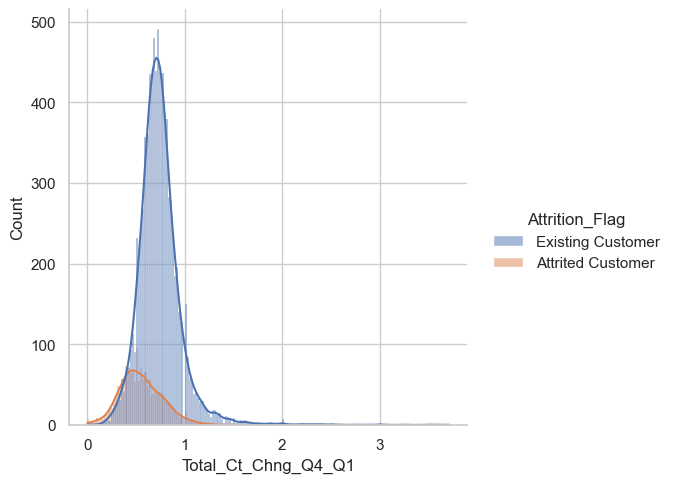

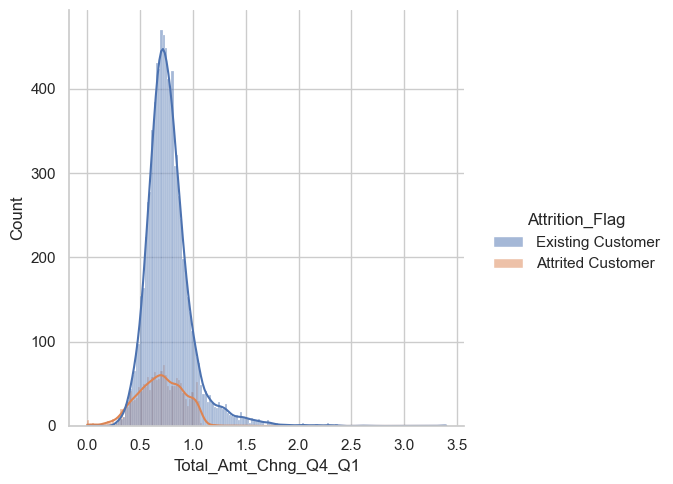

In [42]:
#plot totalct_change and total amount change by attrition flag using seaborn displot
sns.displot(data=df_clean, x='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag', kde=True)
sns.displot(data=df_clean, x='Total_Amt_Chng_Q4_Q1', hue='Attrition_Flag', kde=True)

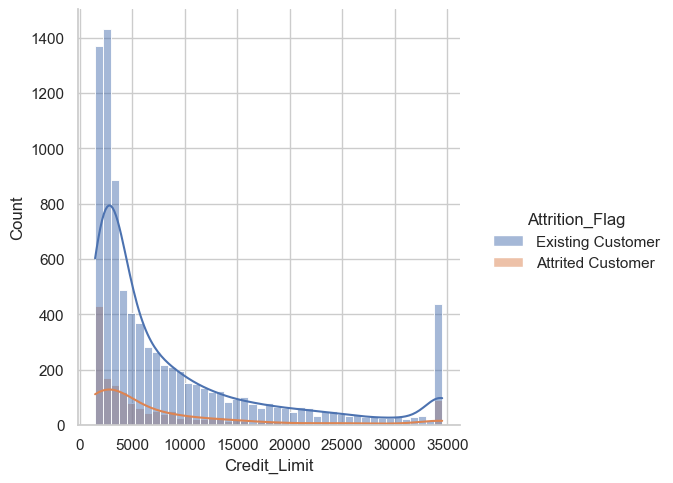

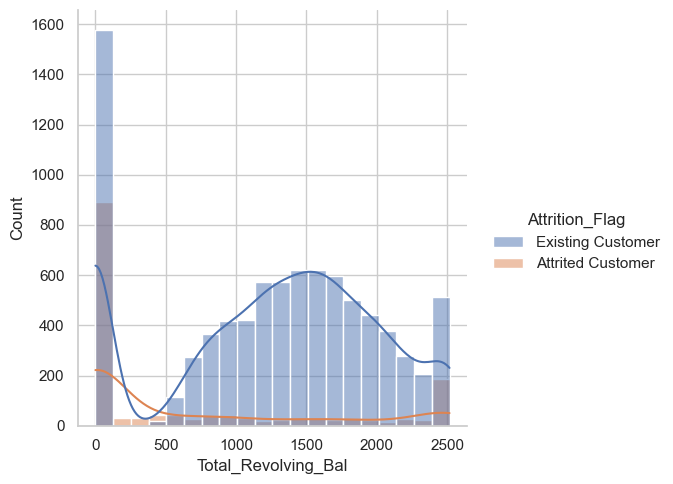

In [43]:
#plot credit limit and total revolving balance by attrition flag using seaborn displot
sns.displot(data=df_clean, x='Credit_Limit', hue='Attrition_Flag', kde=True)
sns.displot(data=df_clean, x='Total_Revolving_Bal', hue='Attrition_Flag', kde=True)

C:\Users\nmbin\AppData\Local\Temp\ipykernel_3568\2925557709.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_clean.corr(method='spearman')


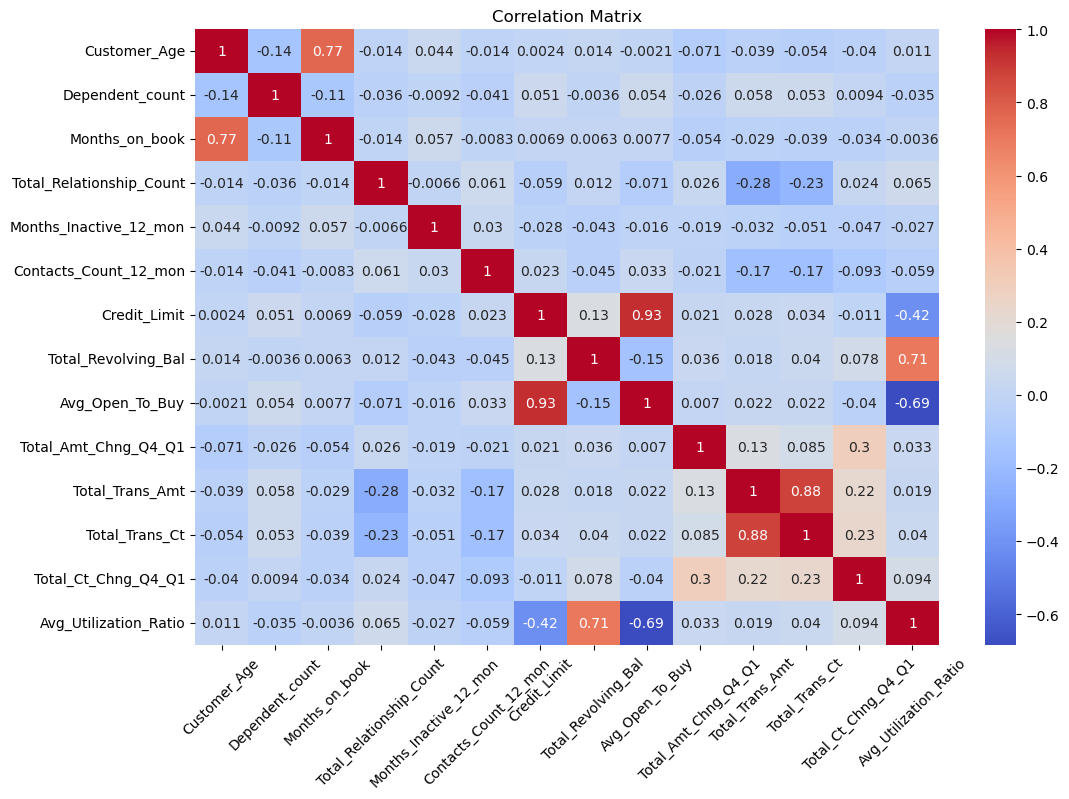

In [17]:
#multi-variate analysis
#heatmap of the correlation matrix
#correlation matrix (spearman correlation)

corr_matrix = df_clean.corr(method='spearman')
#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

#make xaxis label slanted
plt.xticks(rotation=45)
plt.show()


In [51]:
#scatter plot of credit limit and total revolving balance plotly
import plotly.express as px
fig = px.scatter(df_clean, x='Credit_Limit', y='Total_Revolving_Bal', color='Attrition_Flag')
fig.show()

In [54]:
#scatter plot of total transaction count and total transaction amount plotly with overlap animation
import plotly.express as px
fig = px.scatter(df_clean, x='Total_Trans_Ct', y='Total_Trans_Amt', animation_group='Attrition_Flag', color='Attrition_Flag')
fig.show()


